In [15]:
from scipy import stats
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import seaborn as sns
#from matplotlib import subplots

import colorsys
import matplotlib





In [16]:
df = pd.read_csv("dataset_N2N.csv", sep=",", header=0)
df.head()

,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,...,RVV38,RVV39,RVV40,RVV41,RVV42,RVV43,RVV44,RVV45,RVV46,RVV47
0,0.000000,0.000000e+00,10757.166,0.999986,0.000014,2.397178e-10,4.558197e-15,9.939829e-20,2.485752e-24,7.129016e-29,...,-2.401320e-109,-5.311691e-112,-1.346084e-114,-3.908330e-117,-1.300201e-119,-4.956191e-122,-2.164807e-124,-1.083521e-126,-6.214598e-129,-4.115686e-131
1,0.000004,8.216688e-12,10757.146,0.999963,0.000037,1.815259e-09,1.240808e-13,1.154856e-17,1.419631e-21,2.233567e-25,...,4.313327e+01,4.319762e+01,4.302709e+01,4.261090e+01,4.193997e+01,4.100697e+01,3.980402e+01,3.819891e+01,3.036801e+01,-1.093747e+03
2,0.000008,1.643338e-11,10757.126,0.999941,0.000059,4.418282e-09,4.266114e-13,5.241519e-17,8.059130e-21,1.524676e-24,...,2.222941e+02,2.225802e+02,2.216414e+02,2.194194e+02,2.158637e+02,2.109328e+02,2.045732e+02,1.958232e+02,1.487166e+02,-5.628267e+03
3,0.000012,2.465006e-11,10757.106,0.999919,0.000081,8.070145e-09,9.922813e-13,1.496790e-16,2.742066e-20,6.035964e-24,...,6.379328e+02,6.386028e+02,6.357109e+02,6.290790e+02,6.185514e+02,6.039950e+02,5.852063e+02,5.583745e+02,4.014412e+02,-1.612388e+04
4,0.000029,6.058392e-11,10757.020,0.999822,0.000178,3.553516e-08,8.802196e-12,2.765142e-15,1.098811e-18,5.460371e-22,...,8.370745e+03,8.365424e+03,8.308980e+03,8.198153e+03,8.029840e+03,7.800562e+03,7.495944e+03,6.918945e+03,3.138381e+03,-2.091199e+05


In [17]:
df2 = df.iloc[:,0:55]

In [18]:
feature_names = ["x_s","time_s", "Temp"] + [f"X{i}" for i in range(1, 48)] + ["rho", "v","p"] + [f"RDm{i}" for i in range(1, 47)] + [f"RDa{i}" for i in range(1, 47)] + [f"RVTm{i}" for i in range(1, 47)] + [f"RVTa{i}" for i in range(1, 47)] + [f"RVV{i}" for i in range(1, 47)]
list1 = list(feature_names)
v = list1[0:53:1]

In [19]:
df2.head()

,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,...,X43,X44,X45,X46,X47,X48,rho,v,p,RDm1
0,0.000000,0.000000e+00,10757.166,0.999986,0.000014,2.397178e-10,4.558197e-15,9.939829e-20,2.485752e-24,7.129016e-29,...,8.870698e-153,4.043625e-155,2.113864e-157,1.267290e-159,8.713009e-162,0.000000e+00,0.006989,810.67267,22324.995,-1.288026e+24
1,0.000004,8.216688e-12,10757.146,0.999963,0.000037,1.815259e-09,1.240808e-13,1.154856e-17,1.419631e-21,2.233567e-25,...,1.675730e-28,1.824564e-28,1.982113e-28,2.148079e-28,2.309744e-28,8.220368e-10,0.006989,810.67080,22325.006,-1.287980e+24
2,0.000008,1.643338e-11,10757.126,0.999941,0.000059,4.418282e-09,4.266114e-13,5.241519e-17,8.059130e-21,1.524676e-24,...,8.638381e-28,9.404773e-28,1.021571e-27,1.106897e-27,1.188562e-27,1.644074e-09,0.006989,810.66892,22325.016,-1.287934e+24
3,0.000012,2.465006e-11,10757.106,0.999919,0.000081,8.070145e-09,9.922813e-13,1.496790e-16,2.742066e-20,6.035964e-24,...,2.479758e-27,2.699481e-27,2.931863e-27,3.176013e-27,3.404999e-27,2.466111e-09,0.006989,810.66705,22325.027,-1.287888e+24
4,0.000029,6.058392e-11,10757.020,0.999822,0.000178,3.553516e-08,8.802196e-12,2.765142e-15,1.098811e-18,5.460371e-22,...,3.260812e-26,3.547118e-26,3.848727e-26,4.160931e-26,4.416154e-26,6.061110e-09,0.006989,810.65886,22325.073,-1.287687e+24


In [20]:
# X = df.iloc[:,0:53].values    # x_s, time_s, Temp, ni_n, na_n, rho, v, p, E, H
# y = df.iloc[:,53:54].values 

corr_matrix = df2.corr(method='pearson')


In [21]:
corr_matrix


,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,...,X43,X44,X45,X46,X47,X48,rho,v,p,RDm1
x_s,1.000000,1.000000,-0.604673,-0.324033,0.042998,0.078418,0.031574,-0.028384,-0.087119,-0.139850,...,-0.216828,-0.131086,0.005485,0.181648,0.305610,0.640557,0.620023,-0.588375,0.588375,0.376445
time_s,1.000000,1.000000,-0.604673,-0.324033,0.042998,0.078418,0.031574,-0.028384,-0.087119,-0.139850,...,-0.216828,-0.131086,0.005485,0.181648,0.305610,0.640557,0.620023,-0.588375,0.588375,0.376445
Temp,-0.604673,-0.604673,1.000000,0.756853,-0.264673,-0.422857,-0.384261,-0.307319,-0.222798,-0.141581,...,0.153589,0.033831,-0.154833,-0.391671,-0.553020,-0.968363,-0.998735,0.997409,-0.997409,-0.812568
X1,-0.324033,-0.324033,0.756853,1.000000,-0.733167,-0.908069,-0.877722,-0.814870,-0.744602,-0.675220,...,-0.305955,-0.385889,-0.499453,-0.618354,-0.680652,-0.578812,-0.730330,0.800074,-0.800074,-0.994226
X2,0.042998,0.042998,-0.264673,-0.733167,1.000000,0.857229,0.727564,0.636092,0.566772,0.511490,...,0.240340,0.259524,0.281579,0.293799,0.289989,0.104294,0.237837,-0.310766,0.310766,0.715481
X3,0.078418,0.078418,-0.422857,-0.908069,0.857229,1.000000,0.971345,0.922101,0.869315,0.817653,...,0.471517,0.507276,0.547914,0.568928,0.559563,0.201464,0.387806,-0.483127,0.483127,0.868037
X4,0.031574,0.031574,-0.384261,-0.877722,0.727564,0.971345,1.000000,0.986480,0.957275,0.921540,...,0.596957,0.627812,0.657191,0.657227,0.628115,0.145614,0.346782,-0.448962,0.448961,0.822936
X5,-0.028384,-0.028384,-0.307319,-0.814870,0.636092,0.922101,0.986480,1.000000,0.991419,0.971460,...,0.686719,0.708457,0.721156,0.695765,0.645744,0.061328,0.268649,-0.374367,0.374367,0.748769
X6,-0.087119,-0.087119,-0.222798,-0.744602,0.566772,0.869315,0.957275,0.991419,1.000000,0.994038,...,0.753336,0.765258,0.760876,0.710925,0.641679,-0.025654,0.183609,-0.291073,0.291073,0.669713
X7,-0.139850,-0.139850,-0.141581,-0.675220,0.511490,0.817653,0.921540,0.971460,0.994038,1.000000,...,0.802462,0.805108,0.784979,0.713101,0.627187,-0.106343,0.102338,-0.210320,0.210320,0.593591


In [22]:
corr_df_N2N= df2.corr().loc[:, "RDm1"].to_frame().reset_index()
corr_df_N2N.to_csv('corr_df_N2N.csv', index=False)

In [23]:
im = corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

In [24]:
im

,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,rho,v,p,RDm1
x_s,1.00,1.00,-0.60,-0.32,0.04,0.08,0.03,-0.03,-0.09,-0.14,-0.19,-0.22,-0.25,-0.28,-0.30,-0.32,-0.33,-0.35,-0.36,-0.36,-0.37,-0.37,-0.38,-0.38,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.38,-0.38,-0.38,-0.37,-0.37,-0.36,-0.35,-0.34,-0.33,-0.30,-0.27,-0.22,-0.13,0.01,0.18,0.31,0.64,0.62,-0.59,0.59,0.38
time_s,1.00,1.00,-0.60,-0.32,0.04,0.08,0.03,-0.03,-0.09,-0.14,-0.19,-0.22,-0.25,-0.28,-0.30,-0.32,-0.33,-0.35,-0.36,-0.36,-0.37,-0.37,-0.38,-0.38,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.38,-0.38,-0.38,-0.37,-0.37,-0.36,-0.35,-0.34,-0.33,-0.30,-0.27,-0.22,-0.13,0.01,0.18,0.31,0.64,0.62,-0.59,0.59,0.38
Temp,-0.60,-0.60,1.00,0.76,-0.26,-0.42,-0.38,-0.31,-0.22,-0.14,-0.07,-0.00,0.05,0.10,0.14,0.17,0.20,0.23,0.25,0.27,0.28,0.30,0.31,0.32,0.33,0.34,0.34,0.35,0.35,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.35,0.35,0.34,0.32,0.30,0.27,0.23,0.15,0.03,-0.15,-0.39,-0.55,-0.97,-1.00,1.00,-1.00,-0.81
X1,-0.32,-0.32,0.76,1.00,-0.73,-0.91,-0.88,-0.81,-0.74,-0.68,-0.61,-0.55,-0.50,-0.45,-0.41,-0.38,-0.35,-0.32,-0.30,-0.28,-0.26,-0.25,-0.24,-0.22,-0.21,-0.21,-0.20,-0.19,-0.18,-0.18,-0.17,-0.17,-0.17,-0.17,-0.16,-0.16,-0.16,-0.16,-0.17,-0.17,-0.18,-0.19,-0.20,-0.22,-0.25,-0.31,-0.39,-0.50,-0.62,-0.68,-0.58,-0.73,0.80,-0.80,-0.99
X2,0.04,0.04,-0.26,-0.73,1.00,0.86,0.73,0.64,0.57,0.51,0.47,0.43,0.40,0.37,0.35,0.33,0.31,0.30,0.28,0.27,0.26,0.26,0.25,0.24,0.24,0.23,0.23,0.22,0.22,0.22,0.21,0.21,0.21,0.21,0.21,0.20,0.20,0.20,0.20,0.20,0.21,0.21,0.21,0.22,0.23,0.24,0.26,0.28,0.29,0.29,0.10,0.24,-0.31,0.31,0.72
X3,0.08,0.08,-0.42,-0.91,0.86,1.00,0.97,0.92,0.87,0.82,0.77,0.73,0.69,0.65,0.62,0.59,0.57,0.55,0.53,0.51,0.50,0.49,0.47,0.46,0.45,0.45,0.44,0.43,0.43,0.42,0.42,0.41,0.41,0.41,0.41,0.40,0.40,0.40,0.40,0.40,0.41,0.41,0.42,0.43,0.45,0.47,0.51,0.55,0.57,0.56,0.20,0.39,-0.48,0.48,0.87
X4,0.03,0.03,-0.38,-0.88,0.73,0.97,1.00,0.99,0.96,0.92,0.88,0.85,0.81,0.78,0.75,0.73,0.70,0.68,0.67,0.65,0.63,0.62,0.61,0.60,0.59,0.58,0.57,0.57,0.56,0.56,0.55,0.55,0.54,0.54,0.54,0.54,0.54,0.53,0.53,0.54,0.54,0.54,0.55,0.56,0.57,0.60,0.63,0.66,0.66,0.63,0.15,0.35,-0.45,0.45,0.82
X5,-0.03,-0.03,-0.31,-0.81,0.64,0.92,0.99,1.00,0.99,0.97,0.95,0.92,0.89,0.86,0.84,0.82,0.80,0.78,0.76,0.75,0.74,0.72,0.71,0.70,0.69,0.69,0.68,0.67,0.67,0.66,0.66,0.65,0.65,0.65,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.65,0.66,0.67,0.69,0.71,0.72,0.70,0.65,0.06,0.27,-0.37,0.37,0.75
X6,-0.09,-0.09,-0.22,-0.74,0.57,0.87,0.96,0.99,1.00,0.99,0.98,0.96,0.94,0.92,0.90,0.88,0.87,0.85,0.84,0.82,0.81,0.80,0.79,0.78,0.77,0.77,0.76,0.75,0.75,0.74,0.74,0.73,0.73,0.73,0.73,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.73,0.73,0.74,0.75,0.77,0.76,0.71,0.64,-0.03,0.18,-0.29,0.29,0.67
X7,-0.14,-0.14,-0.14,-0.68,0.51,0.82,0.92,0.97,0.99,1.00,1.00,0.99,0.97,0.96,0.94,0.93,0.91,0.90,0.89,0.88,0.87,0.86,0.85,0.84,0.83,0.83,0.82,0.82,0.81,0.81,0.80,0.80,0.80,0.79,0.79,0.79,0.79,0.78,0.78,0.78,0.78,0.78,0.79,0.79,0.80,0.80,0.81,0.78,0.71,0.63,-0.11,0.10,-0.21,0.21,0.59


In [25]:
im2 = corr_matrix.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

In [26]:
im2

,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,rho,v,p,RDm1
x_s,1.000000,1.000000,-0.604673,-0.324033,0.042998,0.078418,0.031574,-0.028384,-0.087119,-0.139850,-0.185182,-0.223232,-0.254754,-0.280695,-0.301981,-0.319434,-0.333745,-0.345485,-0.355115,-0.363008,-0.369464,-0.374724,-0.378983,-0.382397,-0.385090,-0.387162,-0.388690,-0.389732,-0.390329,-0.390505,-0.390273,-0.389628,-0.388551,-0.387005,-0.384935,-0.382260,-0.378866,-0.374590,-0.369197,-0.362337,-0.353476,-0.341764,-0.325795,-0.303151,-0.269489,-0.216828,-0.131086,0.005485,0.181648,0.305610,0.640557,0.620023,-0.588375,0.588375,0.376445
time_s,1.000000,1.000000,-0.604673,-0.324033,0.042998,0.078418,0.031574,-0.028384,-0.087119,-0.139850,-0.185182,-0.223232,-0.254754,-0.280695,-0.301981,-0.319434,-0.333745,-0.345485,-0.355115,-0.363008,-0.369464,-0.374724,-0.378983,-0.382397,-0.385090,-0.387162,-0.388690,-0.389732,-0.390329,-0.390505,-0.390273,-0.389628,-0.388551,-0.387005,-0.384935,-0.382260,-0.378866,-0.374590,-0.369197,-0.362337,-0.353476,-0.341764,-0.325795,-0.303151,-0.269489,-0.216828,-0.131086,0.005485,0.181648,0.305610,0.640557,0.620023,-0.588375,0.588375,0.376445
Temp,-0.604673,-0.604673,1.000000,0.756853,-0.264673,-0.422857,-0.384261,-0.307319,-0.222798,-0.141581,-0.068019,-0.003450,0.052256,0.099884,0.140441,0.174938,0.204301,0.229332,0.250714,0.269015,0.284708,0.298185,0.309767,0.319722,0.328270,0.335589,0.341829,0.347108,0.351520,0.355138,0.358013,0.360175,0.361633,0.362371,0.362341,0.361458,0.359580,0.356492,0.351859,0.345171,0.335631,0.321969,0.302093,0.272436,0.226706,0.153589,0.033831,-0.154833,-0.391671,-0.553020,-0.968363,-0.998735,0.997409,-0.997409,-0.812568
X1,-0.324033,-0.324033,0.756853,1.000000,-0.733167,-0.908069,-0.877722,-0.814870,-0.744602,-0.675220,-0.610476,-0.551972,-0.500107,-0.454632,-0.414995,-0.380533,-0.350582,-0.324530,-0.301832,-0.282017,-0.264684,-0.249493,-0.236156,-0.224433,-0.214124,-0.205059,-0.197101,-0.190132,-0.184060,-0.178809,-0.174323,-0.170560,-0.167498,-0.165135,-0.163493,-0.162625,-0.162628,-0.163661,-0.165970,-0.169942,-0.176180,-0.185638,-0.199854,-0.221363,-0.254408,-0.305955,-0.385889,-0.499453,-0.618354,-0.680652,-0.578812,-0.730330,0.800074,-0.800074,-0.994226
X2,0.042998,0.042998,-0.264673,-0.733167,1.000000,0.857229,0.727564,0.636092,0.566772,0.511490,0.466173,0.428481,0.396856,0.370151,0.347469,0.328101,0.311472,0.297120,0.284672,0.273825,0.264332,0.255991,0.248637,0.242137,0.236378,0.231268,0.226731,0.222705,0.219138,0.215987,0.213218,0.210804,0.208727,0.206974,0.205542,0.204440,0.203688,0.203327,0.203427,0.204095,0.205505,0.207924,0.211774,0.217718,0.226772,0.240340,0.259524,0.281579,0.293799,0.289989,0.104294,0.237837,-0.310766,0.310766,0.715481
X3,0.078418,0.078418,-0.422857,-0.908069,0.857229,1.000000,0.971345,0.922101,0.869315,0.817653,0.769244,0.725096,0.685527,0.650438,0.619505,0.592311,0.568417,0.547408,0.528906,0.512577,0.498134,0.485331,0.473959,0.463841,0.454826,0.446789,0.439625,0.433245,0.427574,0.422552,0.418130,0.414270,0.410945,0.408140,0.405855,0.404111,0.402950,0.402452,0.402751,0.404054,0.406689,0.411168,0.418294,0.429327,0.446191,0.471517,0.507276,0.547914,0.568928,0.559563,0.201464,0.387806,-0.483127,0.483127,0.868037
X4,0.031574,0.031574,-0.384261,-0.877722,0.727564,0.971345,1.000000,0.986480,0.957275,0.921540,0.883974,0.847222,0.812691,0.781016,0.752375,0.726693,0.703766,0.683341,0.665151,0.648945,0.634489,0.621578,0.610031,0.599692,0.590426,0.582118,0.574669,0.567998,0.562034,0.556718,0.552002,0.547849,0.544231,0.541132,0.538551,0.536502,0.535028,0.534204,0.534157,0.535090,0.537318,0.541334,0.547901,0.558180,0.573863,0.596957,0.627812,0.657191,0.657227,0.628115,0.145614,0.346782,-0.448962,0.448961,0.822936
X5,-0.028384,-0.028384,-0.307319,-0.814870,0.636092,0.922101,0.986480,1.000000,0.991419,0.971460,0.945973,0.918488,0.891096,0.8649

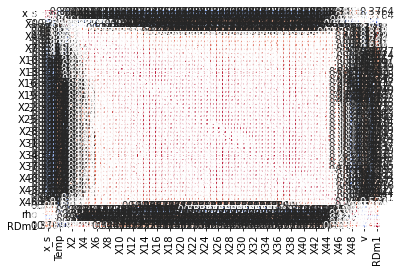

In [27]:
# df = pd.DataFrame(np.random.random((6, 4)), columns=list('ABCD'))
fig, ax = plt.subplots()
sns.heatmap(df2.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

то что не получается:

In [28]:
# html = styled_table.render()

# imgkit.from_string(html, 'styled_table.png')

In [29]:
# N = len(v)
    

In [30]:
# a = []
# # n = list(input("Начало: "))
# # x = list(input("Конец: "))
# for i in range(N):
#     a[i].append()
#     print(a[i])

In [31]:
# N = 54

# M = 54
# ind = np.arange(M)
# list3 = [0]

# fig, ax = plt.subplots()
# im = ax.imshow(corr_matrix)
# im.set_clim(-1, 1)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, .., ind), ticklabels=v)
# ax.yaxis.set(ticks=(0, .., ind), ticklabels=v)
# ax.set_ylim(2.5, -0.5)
# for i in range(N):
#     for j in range(N):
#         ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
#                 color='r')
# cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
# plt.show()

In [34]:
fig, ax = plt.subplots()
data = corr_matrix.values
heatmap = ax.pcolor(data, cmap=plt.get_cmap('coolwarm'),
vmin=np.nanmin(data), vmax=np.nanmax(data))
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.invert_yaxis()
row_labels = corr_matrix.index
column_labels = corr_matrix.columns
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)

def _annotate_heatmap(ax, mesh):
# """
# **Taken from seaborn/matrix.py**
# Add textual labels with the value in each cell.
# """
mesh.update_scalarmappable()
xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
for x, y, val, color in zip(xpos.flat, ypos.flat,
mesh.get_array(), mesh.get_facecolors()):
if val is not np.ma.masked:
_, l, _ = colorsys.rgb_to_hls(*color[:3])
text_color = ".15" if l > .5 else "w"
val = ("{:.3f}").format(val)
text_kwargs = dict(color=text_color, ha="center", va="center")
# text_kwargs.update(self.annot_kws)
ax.text(x, y, val, **text_kwargs)
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
_annotate_heatmap(ax, heatmap)
matplotlib.rc('font', size=1)
plt.figure(figsize=(30, 30))
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0, dpi=100)

IndentationError: expected an indented block (Temp/ipykernel_15216/1513230496.py, line 18)